In [1]:
from dotenv import load_dotenv
load_dotenv()
# get openai-key
import os
from autogen import ConversableAgent
openai_key = os.getenv('OPENAI_API_KEY')
llm_config={"model":"gpt-4-turbo"}

In [2]:
# define code executor
from autogen.coding import LocalCommandLineCodeExecutor
executor = LocalCommandLineCodeExecutor(
    timeout=60, # will timeout in 60 seconds
    work_dir="coding", # all results are generated under the coding folder
)

create Agents

In [3]:
from autogen import ConversableAgent, AssistantAgent

In [4]:
# code executor Agent
code_executor_agent = ConversableAgent(
    name="code_executor_agent",
    llm_config=False,
    code_execution_config={"executor": executor},
    human_input_mode="ALWAYS",
    default_auto_reply=
    "Please continue. If everything is done, reply 'TERMINATE'.",
)

In [5]:
# code writer agent
code_writer_agent = AssistantAgent(
    name="code_writer_agent",
    llm_config=llm_config,
    code_execution_config=False, # does not execute code
    human_input_mode="NEVER",
)
code_writer_agent_system_message = code_writer_agent.system_message
print(code_writer_agent_system_message) # system message of the code writer agent

You are a helpful AI assistant.
Solve tasks using your coding and language skills.
In the following cases, suggest python code (in a python coding block) or shell script (in a sh coding block) for the user to execute.
    1. When you need to collect info, use the code to output the info you need, for example, browse or search the web, download/read a file, print the content of a webpage or a file, get the current date/time, check the operating system. After sufficient info is printed and the task is ready to be solved based on your language skill, you can solve the task by yourself.
    2. When you need to perform some task with code, use the code to perform the task and output the result. Finish the task smartly.
Solve the task step by step if you need to. If a plan is not provided, explain your plan first. Be clear which step uses code, and which step uses your language skill.
When using code, you must indicate the script type in the code block. The user cannot provide any other feed

Task

In [6]:
#
import datetime

today = datetime.datetime.now().date()
message = f"Today is {today}. "\
"Create a plot showing stock gain YTD for NVDA and TLSA. "\
"Make sure the code is in markdown code block and save the figure"\
" to a file ytd_stock_gains.png."""

chat_result = code_executor_agent.initiate_chat(
    code_writer_agent,
    message=message,
)

code_executor_agent (to code_writer_agent):

Today is 2024-07-09. Create a plot showing stock gain YTD for NVDA and TLSA. Make sure the code is in markdown code block and save the figure to a file ytd_stock_gains.png.

--------------------------------------------------------------------------------
code_writer_agent (to code_executor_agent):

To retrieve the Year-To-Date (YTD) stock price data for NVDA and TSLA and generate a plot, we'll approach this with the following steps:

1. Use an API to obtain the daily stock prices for both companies from the beginning of the year (2024) to today (2024-07-09).
2. Calculate the YTD gain for each day as a percentage of the price relative to the closing price on the first trading day of the year.
3. Plot these data points using matplotlib to visualize the YTD gains.
4. Save the plot to a file named "ytd_stock_gains.png".

For this task, we'll utilize the `yfinance` Python library to fetch stock data. First, ensure to have this library installed. 

draw

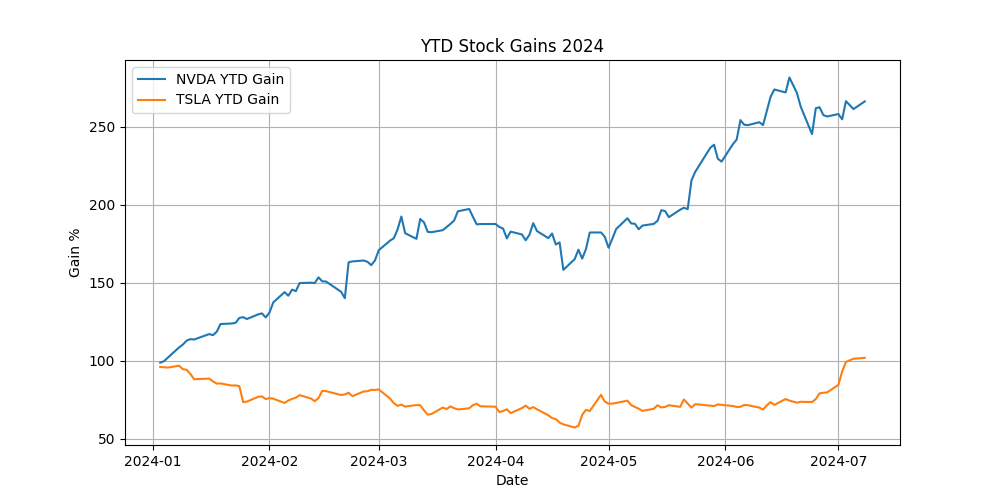

In [7]:
import os
from IPython.display import Image

Image(os.path.join("coding", "ytd_stock_gains.png"))

# ayni görev with func calling

func definge by user

In [8]:
def get_stock_prices(stock_symbols, start_date, end_date):
    """Get the stock prices for the given stock symbols between
    the start and end dates.

    Args:
        stock_symbols (str or list): The stock symbols to get the
        prices for.
        start_date (str): The start date in the format 
        'YYYY-MM-DD'.
        end_date (str): The end date in the format 'YYYY-MM-DD'.
    
    Returns:
        pandas.DataFrame: The stock prices for the given stock
        symbols indexed by date, with one column per stock 
        symbol.
    """
    import yfinance

    stock_data = yfinance.download(
        stock_symbols, start=start_date, end=end_date
    )
    return stock_data.get("Close")

def plot_stock_prices(stock_prices, filename):
    """Plot the stock prices for the given stock symbols.

    Args:
        stock_prices (pandas.DataFrame): The stock prices for the 
        given stock symbols.
    """
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 5))
    for column in stock_prices.columns:
        plt.plot(
            stock_prices.index, stock_prices[column], label=column
                )
    plt.title("Stock Prices")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.grid(True)
    plt.savefig(filename)

executor for user Func

In [9]:
executor = LocalCommandLineCodeExecutor(
    timeout=60,
    work_dir="coding",
    functions=[get_stock_prices, plot_stock_prices],
)

code_writer_agent_system_message += executor.format_functions_for_prompt()
print(code_writer_agent_system_message)

You are a helpful AI assistant.
Solve tasks using your coding and language skills.
In the following cases, suggest python code (in a python coding block) or shell script (in a sh coding block) for the user to execute.
    1. When you need to collect info, use the code to output the info you need, for example, browse or search the web, download/read a file, print the content of a webpage or a file, get the current date/time, check the operating system. After sufficient info is printed and the task is ready to be solved based on your language skill, you can solve the task by yourself.
    2. When you need to perform some task with code, use the code to perform the task and output the result. Finish the task smartly.
Solve the task step by step if you need to. If a plan is not provided, explain your plan first. Be clear which step uses code, and which step uses your language skill.
When using code, you must indicate the script type in the code block. The user cannot provide any other feed

aktualisiere Agent by System message

In [10]:
code_writer_agent = ConversableAgent(
    name="code_writer_agent",
    system_message=code_writer_agent_system_message,
    llm_config=llm_config,
    code_execution_config=False,
    human_input_mode="NEVER",
)

code_executor_agent = ConversableAgent(
    name="code_executor_agent",
    llm_config=False,
    code_execution_config={"executor": executor},
    human_input_mode="ALWAYS",
    default_auto_reply=
    "Please continue. If everything is done, reply 'TERMINATE'.",
)

start same task

In [11]:
chat_result = code_executor_agent.initiate_chat(
    code_writer_agent,
    message=f"Today is {today}."
    "Download the stock prices YTD for NVDA and TSLA and create"
    "a plot. Make sure the code is in markdown code block and "
    "save the figure to a file stock_prices_YTD_plot.png.",
)

code_executor_agent (to code_writer_agent):

Today is 2024-07-09.Download the stock prices YTD for NVDA and TSLA and createa plot. Make sure the code is in markdown code block and save the figure to a file stock_prices_YTD_plot.png.

--------------------------------------------------------------------------------
code_writer_agent (to code_executor_agent):

To achieve the task of downloading Year-To-Date (YTD) stock prices for NVIDIA (NVDA) and Tesla (TSLA), and creating a plot saved to a file named `stock_prices_YTD_plot.png`, we will execute the following plan:

1. Determine the YTD start date for 2024, which is `2024-01-01`.
2. Use the `get_stock_prices` function to download the stock prices for NVDA and TSLA from `2024-01-01` to the current date `2024-07-09`.
3. Plot the downloaded stock prices using the `plot_stock_prices` function, and save the output to `stock_prices_YTD_plot.png`.

I will provide you the complete Python code to execute all these steps. Please ensure you have th

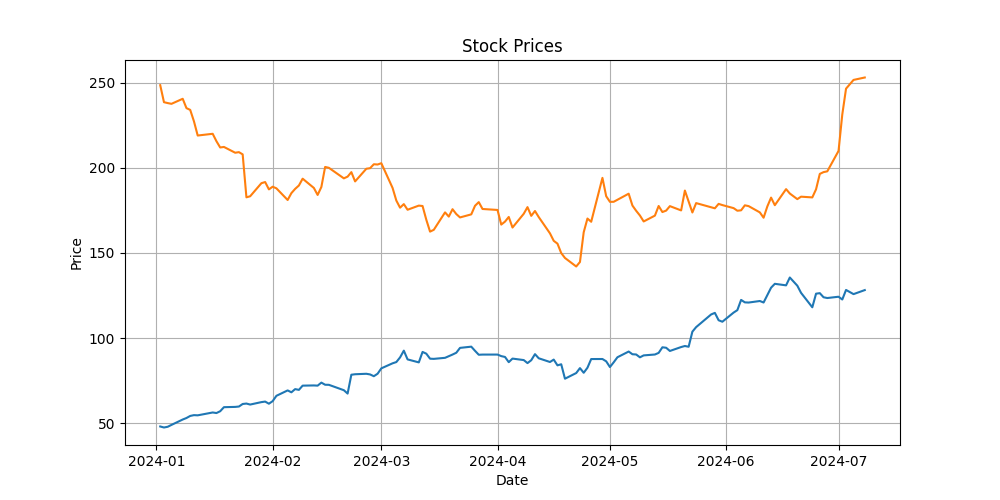

: 

In [12]:
Image(os.path.join("coding", "stock_prices_YTD_plot.png"))